# Olypics Data Analysis
## CS 176 Project

By: Srushti Vaidyanathan (vaidyan4@purdue.edu), Paige Burke (burke231@purdue.edu), Brooklyn Fugate (fugate11@purdue.edu)

## Set Up

In [102]:
# importing pandas as pd, matplotlib as plt, and numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read datasets from their csv files to the dataframe
athletes_df = pd.read_csv('olympic_atheletes_history_biometrics_data.csv')
summer_df = pd.read_csv('summer_olympics_medals_data.csv')
winter_df = pd.read_csv('winter_olympics_medals_data.csv')

In [71]:
athletes_df.head(5)

,ID,ATHLETE_NAME,SEX,AGE,HEIGHT,WEIGHT,NOC,TEAM,Unnamed: 8
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Netherlands,NaN


In [72]:
summer_df.head(5)

,Year,Name,Games,City,Sport,Event,Medal
0,1896,Aristidis Akratopoulos,1896 Summer,Athina,Tennis,Tennis Men's Singles,NaN
1,1896,Aristidis Akratopoulos,1896 Summer,Athina,Tennis,Tennis Men's Doubles,NaN
2,1896,Konstantinos Akratopoulos,1896 Summer,Athina,Tennis,Tennis Men's Singles,NaN
3,1896,Konstantinos Akratopoulos,1896 Summer,Athina,Tennis,Tennis Men's Doubles,NaN
4,1896,Anastasios Andreou,1896 Summer,Athina,Athletics,Athletics Men's 110 metres Hurdles,NaN


In [73]:
winter_df.head(5)

,Year,Name,Games,City,Sport,Event,Medal
0,1924,Clarence John Abel,1924 Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
1,1924,Josef Adolf,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN
2,1924,Xavier Affentranger,1924 Winter,Chamonix,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN
3,1924,Xavier Affentranger,1924 Winter,Chamonix,Cross Country Skiing,Cross Country Skiing Men's 18 kilometres,NaN
4,1924,Xavier Affentranger,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN


## Cleaning

CLEANING IS ALSO DONE THROUGHOUT THE OTHER STEPS

In [110]:
# deleting this column as it was empty and was just an extra comma in the csv
athletes_df = athletes_df.drop('Unnamed: 8', axis=1)
athletes_df = athletes_df.drop('ID', axis=1)

In [132]:
# standardizing to date time format for all the dfs
winter_df['Year'] = pd.to_datetime(winter_df['Year'], format='%Y')
summer_df['Year'] = pd.to_datetime(summer_df['Year'], format='%Y')

winter_df['Year'] = winter_df['Year'].dt.strftime('%Y')
summer_df['Year'] = summer_df['Year'].dt.strftime('%Y')

,Year,Name,Games,City,Sport,Event,Medal
0,1924,Clarence John Abel,1924 Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
1,1924,Josef Adolf,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN
2,1924,Xavier Affentranger,1924 Winter,Chamonix,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN
3,1924,Xavier Affentranger,1924 Winter,Chamonix,Cross Country Skiing,Cross Country Skiing Men's 18 kilometres,NaN
4,1924,Xavier Affentranger,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN
...,...,...,...,...,...,...,...
48559,2014,Stepan Olegovich Zuyev,2014 Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
48560,2014,Kristaps Zvejnieks,2014 Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
48561,2014,Kristaps Zvejnieks,2014 Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
48562,2014,Piotr ya,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN


In [112]:

# drops any duplicate values from the dfs and only keeps the first value
winter_df = winter_df.drop_duplicates(keep='first')
summer_df = summer_df.drop_duplicates(keep='first')
athletes_df = athletes_df.drop_duplicates(keep='first')

Markdown notes and sentences and analysis written here.

## Filtering

In [114]:
# Creating a subset of biometrics of just males and females, respectively, to compare using visualizations

female_athletes_df = athletes_df[athletes_df['SEX'] == 'F']
male_athletes_df = athletes_df[athletes_df['SEX'] == 'M']

In [218]:
# creates a df of only the athletes who have won a medal in their participation in the Olympics

winners_df = total_df[total_df['Medal'].notna()]

display(winners_df)

ATHLETE_NAME   AGE  HEIGHT  WEIGHT  \
SEX Sport                                                                   
F   Alpine Skiing               Debra Rae Armstrong  20.0   165.0    62.0   
    Alpine Skiing                       Heidi Biebl  19.0   159.0    56.0   
    Alpine Skiing                 Fernande Bochatay  18.0   163.0    57.0   
    Alpine Skiing                 Annemarie Buchner  27.0   181.0    90.0   
    Alpine Skiing                 Annemarie Buchner  27.0   181.0    90.0   
...                                             ...   ...     ...     ...   
M   Wrestling                        Zevegiin Oidov  22.0   168.0    62.0   
    Wrestling      Elmadi Zaynaydiyevich Zhabrailov  26.0   182.0    85.0   
    Wrestling                  Albert Conrad Zirkel  19.0   178.0    96.0   
    Wrestling                            dn Zombori  21.0   175.0    78.0   
    Wrestling                            dn Zombori  21.0   175.0    78.0   

                   NOC           TEAM  Year        Games          City  \
SEX Sport                                                                
F   Alpine Skiing  USA  United States  1984  1984 Winter      Sarajevo   
    Alpine Skiing  GER        Germany  1960  1960 Winter  Squaw Valley   
    Alpine Skiing  SUI    Switzerland  1968  1968 Winter      Grenoble   
    Alpine Skiing  GER        Germany  1952  1952 Winter          Oslo   
    Alpine Skiing  GER        Germany  1952  1952 Winter          Oslo   
...                ...            ...   ...          ...           ...   
M   Wrestling      MGL       Mongolia  1976  1976 Summer      Montreal   
    Wrestling      EUN   Unified Team  1992  1992 Summer     Barcelona   
    Wrestling      USA  United States  1904  1904 Summer     St. Louis   
    Wrestling      HUN        Hungary  1932  1932 Summer   Los Angeles   
    Wrestling      HUN        Hungary  1936  1936 Summer        Berlin   

                                                      Event   Medal  
SEX Sport                                                            
F   Alpine Skiing        Alpine Skiing Women's Giant Slalom    Gold  
    Alpine Skiing            Alpine Skiing Women's Downhill    Gold  
    Alpine Skiing        Alpine Skiing Women's Giant Slalom  Bronze  
    Alpine Skiing            Alpine Skiing Women's Downhill  Silver  
    Alpine Skiing        Alpine Skiing Women's Giant Slalom  Bronze  
...                                                     ...     ...  
M   Wrestling      Wrestling Men's Featherweight, Freestyle  Silver  
    Wrestling       Wrestling Men's Middleweight, Freestyle  Silver  
    Wrestling        Wrestling Men's Lightweight, Freestyle  Bronze  
    Wrestling       Wrestling Men's Bantamweight, Freestyle  Silver  
    Wrestling       Wrestling Men's Bantamweight, Freestyle    Gold  

[39845 rows x 11 columns]

In regards to the filtering above:

The winners_df is a new data frame that only contain the rows of the all_seasons_df (explained below) that have a non-NA value for the 'Medal' column.

We can use this filtered subset to analyze improvement in an athlete's performance over the years, as this only contains the data of the athletes who have won something, so by putting this data in a pivot table (as seen the pivot section below), we can see if an athlete gets better with each year participated in the Olympics.

## Sorting

In [ ]:
# code here

Markdown notes and sentences and analysis written here.

## Merging

In [161]:
# merging the winter_df with summer_df using inner to only have the rows of athletes who have participated in both the summer and winter olympics

overlapping_athletes_df = pd.merge(winter_df, summer_df, on=['Name'], how='inner', suffixes=['_w','_s'])

# filter the data to only include rows where the Summer and Winter participation years were within 20 years of one another
overlapping_athletes_df = overlapping_athletes_df[abs(overlapping_athletes_df['Year_w'].astype(int) - overlapping_athletes_df['Year_s'].astype(int)) <= 20]

print(len(overlapping_athletes_df.Name.unique()))
display(overlapping_athletes_df.tail())

275


,Year_w,Name,Games_w,City_w,Sport_w,Event_w,Medal_w,Year_s,Games_s,City_s,Sport_s,Event_s,Medal_s
1739,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2004,2004 Summer,Athina,Athletics,Athletics Women's 100 metres,Silver
1740,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2004,2004 Summer,Athina,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
1741,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2008,2008 Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN
1742,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2008,2008 Summer,Beijing,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
1743,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2012,2012 Summer,London,Athletics,Athletics Women's 4 x 100 metres Relay,Gold


In regards to the merge above:

The overlapping_athletes_df above is very interesting in the fact that it covers athletes that have competed in both the Summer and the Winter Olympics. It starts by merging the winter_df and the summer_df on the 'Name' column, using the 'inner' merge technique. This allows us to only retain the rows with athletes who have a name under the summer_df and winter_df. However, upon initially analyzing this data, we noticed that some of the athletes had a lengthy gap between their Summer and Winter record (ex. a Summer record 40-60 years apart from their Winter record). This made us realize that there are several athletes with the same name. For this reason, to make the data more accurate, we filtered the data to include only the rows with the Summer year and Winter year value to be within 20 years of each other, as an average athlete won't attend more than 5 Olympic cycles in their lifetime. This filtered the data to be more accurate, such as Lauryn Williams, shown above, who participated in both bobsleigh and athletics. Some of the data however, may still be inaccurate, as several people have had the same names, as well as the fact that for several years, some of the Winter Sports were held along side the Summer Sports. However, generally, this merged and filtered data set well represents the data of athletes who have participated in both the Winter and Summer Olympics. There are 275 unique athletes in this data frame who have participated in both seasons.

In [120]:
# merging the winter_df with summer_df using outer to have all of the rows of both data sets
all_seasons_df = pd.merge(winter_df, summer_df, on=['Year', 'Name', 'Games', 'City', 'Sport', 'Event', 'Medal'], how='outer')

all_seasons_df.head(5)

,Year,Name,Games,City,Sport,Event,Medal
0,1924,Clarence John Abel,1924 Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
1,1924,Josef Adolf,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN
2,1924,Xavier Affentranger,1924 Winter,Chamonix,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN
3,1924,Xavier Affentranger,1924 Winter,Chamonix,Cross Country Skiing,Cross Country Skiing Men's 18 kilometres,NaN
4,1924,Xavier Affentranger,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN


In regards to the merge above:

The new dataframe that was created, called 'all_seasons_df' combines the winter_df and summer_df to have a new dataframe containing data of all instances of an athlete's performance in the Olympics. It will contain the data of every event and the winner from both the summer and the winter olympics. We combined these data frames using the common columns: Year, Name, Games, City, Sport, Event, and Medal.

The main use for this data frame will be to merge this with the athletes_df to get a combined dataframe of all of the data, further explained below.

In [116]:
# Merging all three data sets into a total data set

# first merges the athletes df with winter df
total_df = pd.merge(athletes_df, all_seasons_df, left_on='ATHLETE_NAME', right_on='Name')
total_df = total_df.drop('Name', axis=1)

In regards to the merge above:

The new dataframe that was created, called 'total_df' contains a combined dataframe with the rows and columns from all three of the original data sets, winter_df, summer_df, and athletes_df. It was merged using the all_seasons_df (explained above), and the athletes_df using the name of the athlete. 

We will use this data frame first to clean the data in the athletes_df, by stacking using the gender and sport and sorting these indices, to impute data for the age, height and weight columns of the dataframe. The reason we sort by the gender and sport is so that we can impute similar biometrics for the athletes with missing data (ex. not accidentally using a male wrestlers' weight for a female figure skater).
Next, 

In [117]:
# Cleaning height, weight, and age of total_df by stack and sorting
# by gender and sport, then imputing, to get similar data to fill in the NA values

total_df = total_df.set_index(['SEX', 'Sport']).sort_index()
total_df['AGE'] = total_df['AGE'].ffill()
total_df['HEIGHT'] = total_df['HEIGHT'].ffill()
total_df['WEIGHT'] = total_df['WEIGHT'].ffill()

Markdown notes and sentences and analysis written here.

## Visualizations

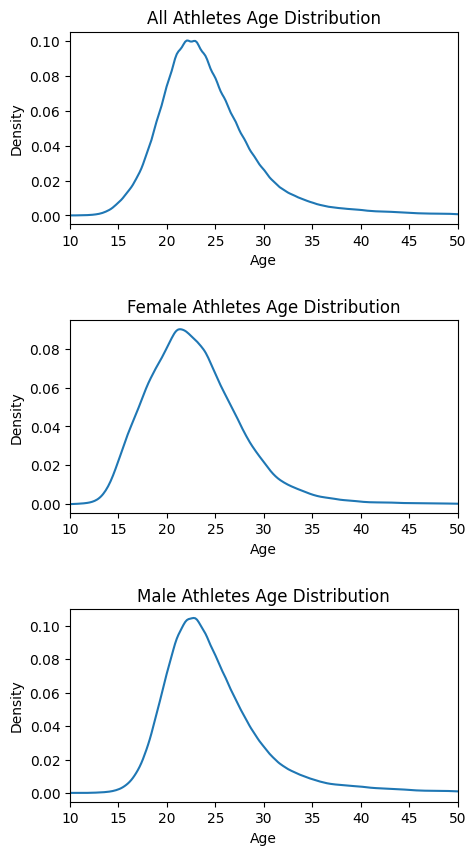

In [281]:
# graph age for all athletes, female, and males and see where most athletes lie

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
plt.subplots_adjust(hspace=0.5)

# creates the plots
athletes_df['AGE'].plot.kde(ax=ax[0])
female_athletes_df['AGE'].plot.kde(ax=ax[1])
male_athletes_df['AGE'].plot.kde(ax=ax[2])

# sets the x limit so that it fits the general age range for athletes
ax[0].set_xlim(10, 50)
ax[1].set_xlim(10, 50)
ax[2].set_xlim(10, 50)

# sets the xticks so that we can see closer to where the discrepencies between each subset is
ax[0].set_xticks([x for x in range(10, 51, 5)])
ax[1].set_xticks([x for x in range(10, 51, 5)])
ax[2].set_xticks([x for x in range(10, 51, 5)])

# sets the labels and titles
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[2].set_xlabel('Age')

ax[0].set_title('All Athletes Age Distribution')
ax[1].set_title('Female Athletes Age Distribution')
ax[2].set_title('Male Athletes Age Distribution')

plt.show()

In regards to the above visualization:

The graphs above are 3 density graphs that each respectively analyze the age of all athletes, just female athletes, and just male athletes. As we can see, the majority of athletes, in all three dataframes, fall between the ages of about 15 and 35. This makes sense as the minimum age you have to be to enter in the Olympics is 15 years old. 35 also makes sense as an upper end of the scale as the average retirement age for professional atheletes is 30, so having a small percentage of athletes (about 5%) who go outside that range makes sense. Something to notice between the female distribution vs the male distributions is that the females seems to have more younger participants vs males having older. The female distribution starts at an age younger than 15 (as the minimum age rule was implemented in 1981, so several games occured where athletes could have been younger) while the male distribution starts after the age of 15. However, the female distribution dies down around 35 years old while the male distribution is still on a decline and ends closer to 40. Females generally also seem to have a bit of a more even spread of age over their range, as the peak of their distribution has a smaller percentage than the peak of the male distribution. This trend can also be noticed in the fact that the graph itself of females is wider vs males having a steaper incline/decline to the peak.

## Pivoting and Stacking

In [227]:
# pivot the data by player names and have the columns be the games,
# values will be the medals to see the change in their winnings and improvement through the years

copy_winners_df = winners_df.copy().reset_index()

winners_subset = copy_winners_df[['ATHLETE_NAME', 'Year', 'Medal', 'Event']]

winners_pt = winners_subset.pivot_table(index=['ATHLETE_NAME'], columns='Medal', values='Year', aggfunc='first')

winners_pt.stack()

winners_pt.sort_index()

display(winners_pt)

Medal,Bronze,Gold,Silver
ATHLETE_NAME,,,
A. Albert,NaN,1900,NaN
A. Dubois,1900,NaN,1900
A. Joshua West,NaN,NaN,2008
A. Lawry,NaN,NaN,1908
A. M. Woods,NaN,NaN,1904
...,...,...,...
va Rakusz,1980,NaN,1988
va Risztov,NaN,2012,NaN
va Szkely,NaN,1952,1956


In [299]:
# stack by country and gender to break down biometrics average by demographic

copy_athletes_df = athletes_df.copy()

athletes_pt = copy_athletes_df.pivot_table(index='NOC', columns='SEX', values=['AGE', 'WEIGHT', 'HEIGHT'], aggfunc=['mean', 'min', 'max'])

display(athletes_pt.stack().sort_index())

mean                          min                 max         \
               AGE      HEIGHT     WEIGHT   AGE HEIGHT WEIGHT   AGE HEIGHT   
NOC SEX                                                                      
AFG F    19.750000  167.500000  58.250000  18.0  160.0   52.0  23.0  180.0   
    M    23.379310  170.416667  67.170732  17.0  156.0   48.0  35.0  186.0   
AHO F    24.800000  170.000000  59.000000  16.0  163.0   52.0  41.0  181.0   
    M    25.255814  177.680000  76.940000  15.0  152.0   52.0  41.0  193.0   
ALB F    24.312500  166.285714  57.928571  16.0  159.0   45.0  46.0  180.0   
...            ...         ...        ...   ...    ...    ...   ...    ...   
YUG M    23.878417  182.056528  79.219512  13.0  150.0   45.0  54.0  217.0   
ZAM F    20.615385  166.600000  58.400000  15.0  159.0   49.0  34.0  182.0   
    M    23.407767  172.738095  66.326316  16.0  150.0   48.0  34.0  190.0   
ZIM F    24.521127  163.222222  57.873016  13.0  138.0   44.0  46.0  187.0   
    M    26.462810  177.982759  73.264957  16.0  148.0   48.0  54.0  205.0   

                
        WEIGHT  
NOC SEX         
AFG F     70.0  
    M    111.0  
AHO F     65.0  
    M    120.0  
ALB F     76.0  
...        ...  
YUG M    130.0  
ZAM F     68.0  
    M     95.0  
ZIM F     86.0  
    M    106.0  

[450 rows x 9 columns]

Markdown notes and sentences and analysis written here.